In [ ]:
'''

1 ) "uber-raw-data-janjune-15.csv" ->> this data contains all the entries/pickups from 'January' to 'June'
    Quite huge dataset having approx 15M data pts , so lets consider its sample which have approx 1M


2 ) "uber-raw-data-janjune-15_sample.csv" ->> this data is a sample of "uber-raw-data-janjune-15.csv"
    'Since above data is quite huge ~15 Million data pts , hence it is good to work with some sample 
     if u do not have good specifications in your systems
    
'''

# 1️⃣ Lets Read data for Analysis

In [ ]:
'''

Hy there , in order to build such a end-end Uber Data analytics dashbaord, 
u have to actually follow Entire life cycle of Data Analytics !

So very first we are going to open Anaconda Navigator which we have already downloaded & now we will launch 
jupyter notebook IDE where we will code in Python Programming !




Talk about packages 
'''

In [1]:
### lets import all the necessary packages !

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install plotly

In [2]:
import plotly.express as px

In [ ]:
'''

Coming to data for for this project , u can do simple Google search as : uber pickups in New york 
U will find this data from Kaggle & u can just download that !

For those of you if you dont know Kaggle , so kaggle is a place where u can find real world Datasets for your Porject !


we have all these datasets that we have consider for this Project !

'''

In [3]:
import os

## lets import os packge to interact with our operating system as we have all the data in our operating system !

In [4]:
os.listdir(r"R:\All_Datasets\Data_Analysis_Projects\Uber\Datasets")

## explain raw string !

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber_vs_Lyft_vs_FHV.csv']

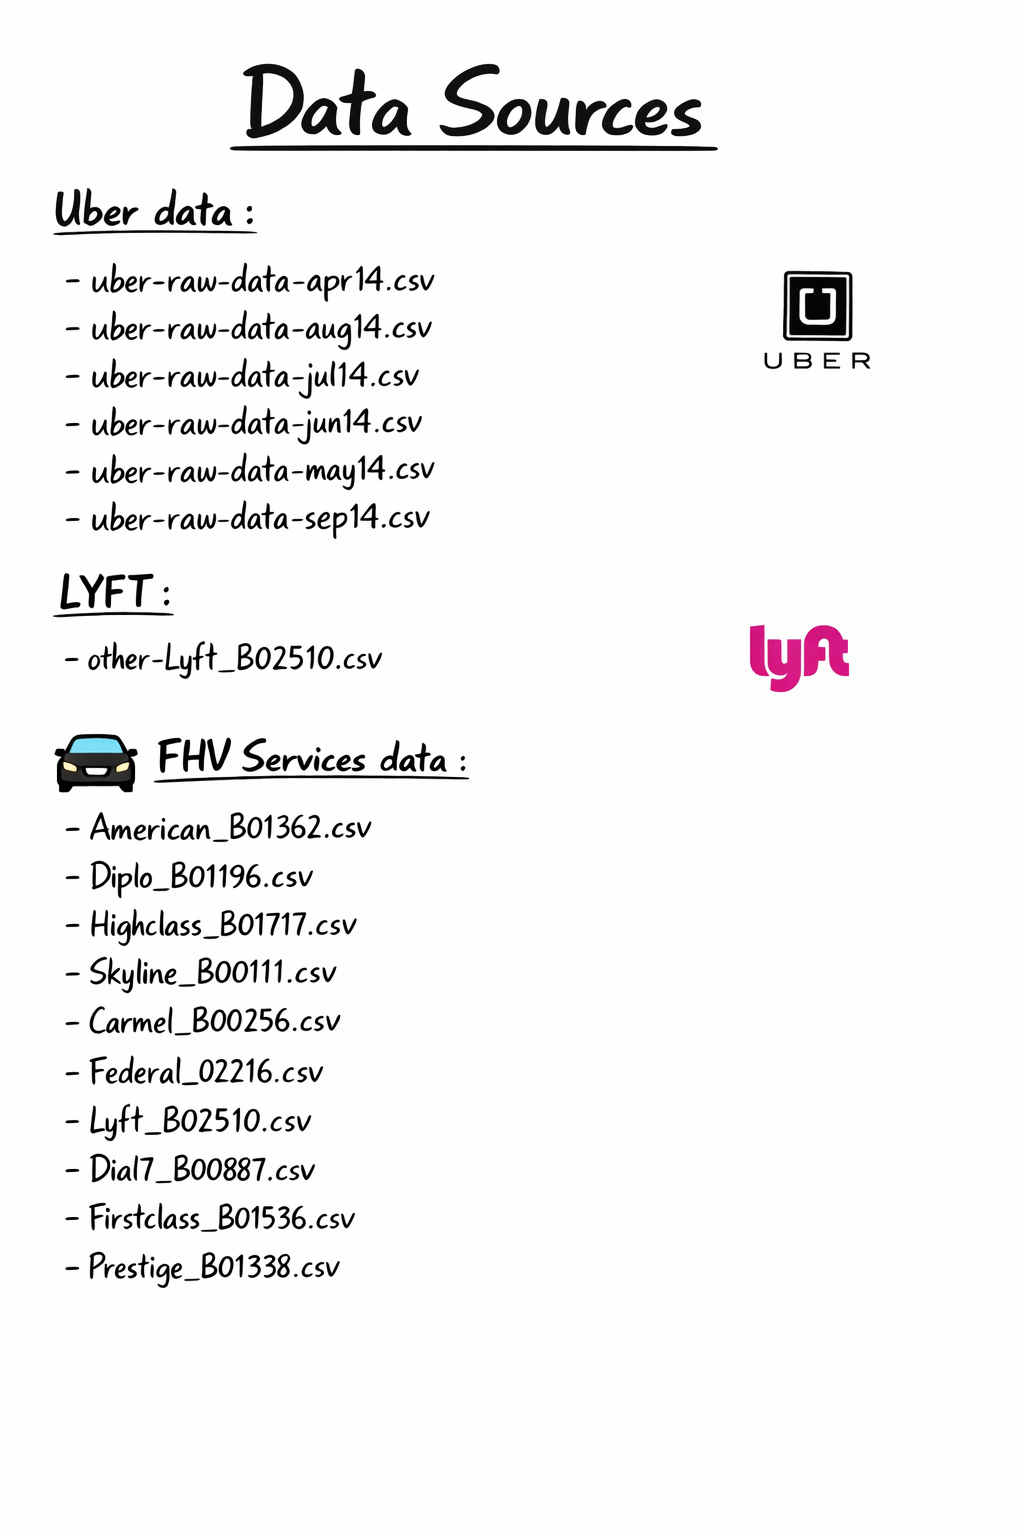

In [ ]:
'''


uber-raw-data-janjune-15 have around 14M+ data pts,  
so if u do not have efficient system , u can consider sample of this data 
which is "uber-raw-data-janjune-15_sample.csv"



'''

In [5]:
## read data (takes 5-10 sec )

uber_15 = pd.read_csv(r'R:\All_Datasets\Data_Analysis_Projects\Uber\Datasets/uber-raw-data-janjune-15_sample.csv', \
                      encoding='utf-8')

In [6]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [7]:
type(uber_15)

pandas.core.frame.DataFrame

In [ ]:
'''

dataframe is like a simple table which have rows , cols

In pandas , we have 2 types of data-structure :

    1-D known as Series ( Series is like a array or List)
    2-D known as Dataframe  , ( which is like simple excel data or tabular data )

'''

In [ ]:
## Base No. = Uber’s local operations unit that manages vehicles and drivers..
## Dispatching_base_num : Base that dispatched the trip
## Affiliated_base_num : Base no for which driver/vehicle is registered with

In [ ]:
'''

Alright , we have successfully loaded Uber data , now in the next session , we will shed light on 
how to clean this data , bcz real world is always uncleaned , messy !


'''

# 2.. Lets Perform Data pre-processing/Data cleaning !




In [ ]:
'''

Hi there , in the last session , 

Bcz real world is always messy & uncleaned & u have to make it clean !

'''

In [ ]:
'''

Alright , “Before we touch upon data cleaning , pause video & think what type of cleaning u need to perform in real-world & why ?
So lets understand : 

'''

In [ ]:
'''

Show img : 

these two are dupliacte rows !
    
    Missing value : Values which occur when no data is recorded for an observation..




'''

In [8]:
uber_15.shape

(100000, 4)

In [ ]:
### lets handle duplicate instance first 

In [9]:
uber_15.duplicated() ## this will give us boolean series 

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [ ]:
uber_15[uber_15.duplicated(keep = False)]

## keep = False returns all rows which are duplicated !
## But it’s hard to visually confirm whether rows are truly identical

In [10]:
## So lets show identical rows to come together !
## u can sort duplicated rows so that identical records appear side-by-side,


uber_15[uber_15.duplicated(keep = False)].sort_values(by = uber_15.columns.tolist())

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
63404,B02598,2015-02-01 14:25:37,B02598,234
64734,B02598,2015-02-01 14:25:37,B02598,234
69742,B02598,2015-03-30 14:03:00,B02598,137
80080,B02598,2015-03-30 14:03:00,B02598,137
48594,B02598,2015-05-17 00:09:00,B02598,170
...,...,...,...,...
62914,B02765,2015-04-04 15:39:00,B02765,133
72891,B02765,2015-04-12 02:44:00,B02765,158
77361,B02765,2015-04-12 02:44:00,B02765,158
94553,B02765,2015-04-25 19:18:00,B02765,236


In [11]:
uber_15.drop_duplicates(inplace = True) ### lets remove duplicated instances !

In [12]:
uber_15.duplicated().sum()

0

In [13]:
uber_15.shape

(99946, 4)

In [ ]:
## lets check whether we have missing values or not !

In [14]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [ ]:
'''
“Pause the video and think : what should you do ?

Whether to fill these Missing values
Or delete those rows which have missing values


Alright : 
See Affiliated_base_num is not an imp col , so lets skip missing values of this col !
In future if needed , we will handle it !

'''

In [ ]:
## lets check whether data-types are correct or not !

In [15]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
'''

3 features belong to object data-type

    In Python / Pandas:
    object usually means string (text)
    
You have 1 numeric column:

    locationID → int64



'''

In [ ]:
'''

Show img : 

In the NumPy library, integers are mainly of two types:

    a ) signed ( stores both +ve & -ve no)
    b ) unsigned ( stores only +ve no)


Variations of signed int are : ('int64','int32','int16') in numpy library..


Int16 : int16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits to store a value
int32 : int32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits to store a value
int64 : int32 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits to store a value


int16 has has a range of  (2^15 − 1) to -2^15 

int32 has has a range of (2³¹ − 1) to  -2^31

int64 has has a range of  (2^63 − 1) to -2^63 

             
Now u may ask what is the diff between all three ?
The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8


🎓 Simple Student Takeaway (One Line)
    More bits = more memory it will take = bigger numbers you can store.


'''


In [ ]:
'''
Coming to Pickup_date , it must have a data-type as "date-time"..
In pandas, date & time values are stored using a special data type called : datetime


'''

In [16]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [17]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [ ]:
'''

datetime64[ns]
    datetime64 → Stores date + time information
    ns → Means nanosecond precision (very high accuracy)
    64 means : Each individual datetime value uses 64 bits (8 bytes) of memory.
    

'''

In [92]:
uber_15["Pickup_date"][0]

## it takes 64 bits (8 bytes) of memory..
## Total memory used = number of rows × 8 bytes

## Total Memory ≈ 100,000 × 8 bytes = 800 KB

Timestamp('2015-05-02 21:43:00')

In [ ]:
'''

so till now , we have done lot of data cleaning & we have make this data ready for future analysis  !

Momentum : 
Now in the next session ,  
we will analyse , Which month have max. Uber pickups in New York City .. [ show plot]

'''

# 3.. Which month have max. Uber pickups in New York City ?

In [ ]:
'''

Hi there ,, In the previous session, we learned about data cleaning techniques.
Now, let’s dive into an interesting real-world challenge

WE have to analyse : Which month have max. Uber pickups in New York City 

Coming to life-cycle , all we are trying to do is : Data analysis to make insights out of data !
Alright , “Before we touch upon this task , pause video & think 
How would you approach this problem?
What kind of visualization will clearly explain the insight?


To answer this question, we’ll use a effective plot which is grouped bar chart. !
        on x-axis we have month !
        on y-axis we have total trips !
        Each color: A different weekday


""
& this plot will tell us :

On Saturday & Friday, Uber is getting pickups in each month , it seems that New Yorkers used to go for 
shopping , Malls , fun activities alot on these days !



u basically need such data to create grouped barplot !


'''

In [19]:
uber_15

## but in data , we dont have month , weekday columns !
## we can extract all these cols from "Pickup_date"

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [ ]:
## Pickup_date is a date-time data-type , ie now we can extract date-time components

In [20]:

uber_15['month'] = uber_15['Pickup_date'].dt.month_name()
# dt is pandas datetime accessor to extract various date-time components like day, month, and year from 'Pickup_date' columns..

uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [21]:
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

<Axes: xlabel='month'>

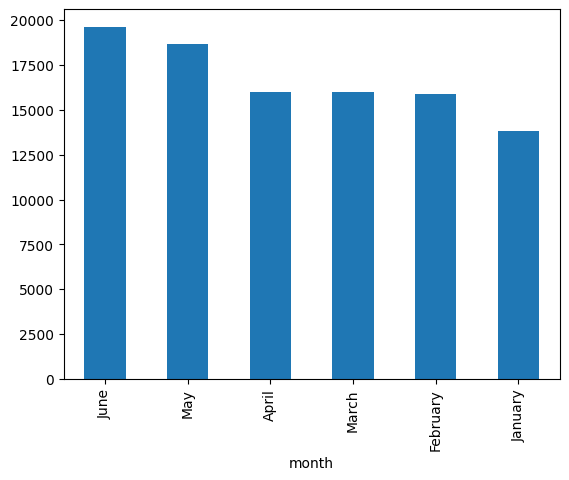

In [22]:
uber_15['month'].value_counts().plot(kind='bar')

In [ ]:
'''
Inference : June seems to have max Uber Pickups 

'''

In [ ]:
'''

show img


'''

In [23]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [24]:
## pd.crosstab() is used to create pivot table ..

pivot = pd.crosstab(index = uber_15['month'] , columns = uber_15['weekday'])

## indexes will be "month"
## cols will be "weekdays"
## default aggfunc is "count"

In [25]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [ ]:
'''


but one thing u will observe months & even weekdays are not sorted !
So lets sort the pivot table we have so that we will have appropriate plot !

'''

In [ ]:
'''

show img


'''

In [ ]:
fig = px.bar(
    pivot,
    x = pivot.index,
    y = pivot.columns,
    barmode = 'group',
    title = 'Uber Pickups by Month and Weekday'
)
fig

In [ ]:
'''


but one thing u will observe xaxis labels & even weekdays are not sorted !
So lets sort the pivot table we have so that we will have appropriate plot !

'''

In [27]:
## lets sort above pivot table ,ie lets Order months & weekdays 
 
# Define the order of months
month_order = ['January', 'February', 'March' , 'April' , "May" , 'June'] 
 
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  

In [28]:
pivot_sorted = pivot.reindex(index = month_order).reindex(columns = weekday_order)
 
pivot_sorted

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
January,1353,1444,1740,2378,2508,2745,1651
February,1970,2129,2013,2396,2655,2550,2183
March,2115,2388,2007,2093,2465,2522,2379
April,1833,1880,2521,2823,2365,2508,2052
May,1865,2115,2328,2627,3262,3519,2944
June,2848,3187,2503,2767,2793,3037,2485


In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

## after warning of barplot

In [29]:
fig = px.bar(
    pivot_sorted,
    x=pivot_sorted.index,
    y=pivot_sorted.columns,
    barmode='group',
    title='Uber Pickups by Month and Weekday'
)


## store into fig later 

In [ ]:
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Pickups',
    legend_title='Weekday'
)



In [ ]:
'''

On Saturday & Friday, u are getting more Uber pickups in each month , it seems that New Yorkers used to go for 
shopping , Malls , fun activities alot on these days


'''

# 4.. Lets Find out Hourly Rush in New york city on all days

In [ ]:
'''

Hi there , 


'''

In [ ]:
'''


To solve this challenge , all you need is this effective multi-line plot :


On x-axis : we have hours
On y-axis : we have total "Uber pickups" in respective hour
Each color: A different weekday



& to get this plot , we need such data !
show img 


'''

In [31]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'weekday', 'day', 'hour', 'minute'],
      dtype='object')

In [ ]:
'''

First I will group all the rows of "weekday" , then group rows of "hour" & then compute total pickups ! 
    so (call size)

use as_index = False to convert data into data-frame !


'''

In [46]:
hourly_rush = uber_15.groupby(['weekday' , 'hour'] , as_index = False).size()

In [47]:
hourly_rush

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


In [ ]:
'''

weekdays are not sorted so very first we have to sort data if we want such plot

show plot 


'''

In [48]:
hourly_rush.sort_values(['weekday', 'hour'])

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


In [ ]:
## By default, weekday is sorted alphabetically, but for analysis you want the natural week order..
## so convert "weekday" to ordered category !

In [49]:
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

In [50]:
hourly_rush['weekday'] = pd.Categorical(
    hourly_rush['weekday'] ,
    categories = weekday_order,
    ordered = True
)

In [51]:
hourly_rush = hourly_rush.sort_values(['weekday', 'hour'])
hourly_rush

,weekday,hour,size
24,Monday,0,339
25,Monday,1,178
26,Monday,2,109
27,Monday,3,100
28,Monday,4,139
...,...,...,...
91,Sunday,19,711
92,Sunday,20,697
93,Sunday,21,615
94,Sunday,22,658


In [52]:
import plotly.express as px

hourly_fig = px.line(
    hourly_rush ,
    x="hour",
    y="size",
    color="weekday",
    markers=True,
    title="Hourly Uber Rush byDays"
)

C:\Users\shant\anaconda3\envs\data_analysis\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\shant\anaconda3\envs\data_analysis\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
hourly_fig

In [97]:

hourly_fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Number of Pickups",
    legend_title="Weekday",
    template="plotly_white"
)


## error will come 


In [ ]:
'''

Uber demand peaks on Friday–Saturday evenings,
with Thursday nights already behaving like the start of the weekend in New York City.


'''

# 5️⃣ Pareto Analysis : 

In [ ]:
'''
Hi there , so far we have performed hourly rush analysis  !

Now lets perform something interesting which is Pareto analysis !
Very first lets understand what is Pareto !

    Pareto Analysis is based on the 80–20 rule:
    In Uber’s context, this means , Around 80% of Uber Trips come from 20% of base no ..



all we need is such data :
show img of data : 




Show plot :
Here
    X-axis → Dispatching Base Number
    Left Y-axis (y) → Trips count (bar chart)
    Right Y-axis (y2) → Cumulative percentage (line chart)
    
What this plots tells us ?

    Bars show total trips per base
    Lineplot shows how quickly total trips accumulate across bases
    80% line helps identify the most important bases





'''

In [55]:
uber_15.head(1)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43


In [56]:
base_counts = uber_15['Dispatching_base_num'].value_counts()
base_counts

## tell u about total trips every base no have completed

Dispatching_base_num
B02764    40267
B02682    24460
B02617    14496
B02598    10644
B02765     8120
B02512     1757
B02835      193
B02836        9
Name: count, dtype: int64

In [57]:
base_counts.sum() ## total uber pickups

99946

In [59]:
base_counts / base_counts.sum()

## this will give what is the uber pickup share of every Base_no !

## B02764    40.2 %
## B02682   24.4
## B02617   14.5 %


## it means all three handles around 80% of total Uber trips !
## & thats what Pareto analysis actuallly is !
## Top 3 Uber Bases Control NYC..

Dispatching_base_num
B02764    0.402888
B02682    0.244732
B02617    0.145038
B02598    0.106498
B02765    0.081244
B02512    0.017579
B02835    0.001931
B02836    0.000090
Name: count, dtype: float64

In [42]:
(base_counts / base_counts.sum()).cumsum()

Dispatching_base_num
B02764    0.402888
B02682    0.647620
B02617    0.792658
B02598    0.899156
B02765    0.980399
B02512    0.997979
B02835    0.999910
B02836    1.000000
Name: count, dtype: float64

| Base              | Cumulative Trips % | Interpretation                            |
| ----------------- | ------------------ | ----------------------------------------- |
| **B02764**        | **40.3%**          | One base handles **~40% of all trips** 🚨 |
| **B02682**        | **64.8%**          | Top 2 bases → **~65% of trips**           |
| **B02617**        | **79.3%**          | Top 3 bases → **~80% of trips**           |
| **B02598**        | **89.9%**          | Top 4 → **90% of trips**                  |
| Remaining 4 bases | ~10%               | Very small contributors                   |

In [ ]:
'''

🔥 This is a STRONG 80–20 effect


Top 3 Uber Bases Control NYC..

'''

In [ ]:
'''

lets create dataframe !

'''

In [60]:
base_df = base_counts.reset_index()
base_df.columns = ['Base', 'Trips']
base_df['Trip_Percentage'] = base_df['Trips'] / base_df['Trips'].sum()
base_df['Cumulative_Percentage'] = base_df['Trip_Percentage'].cumsum()

base_df

,Base,Trips,Trip_Percentage,Cumulative_Percentage
0,B02764,40267,0.402888,0.402888
1,B02682,24460,0.244732,0.647620
2,B02617,14496,0.145038,0.792658
3,B02598,10644,0.106498,0.899156
4,B02765,8120,0.081244,0.980399
5,B02512,1757,0.017579,0.997979
6,B02835,193,0.001931,0.999910
7,B02836,9,0.000090,1.000000


In [61]:
import plotly.graph_objects as go

In [ ]:
'''

show plot


& say we need 2 plots & 2 axes  , one for barplot & another for scatterplot 



'''

In [66]:
pareto = go.Figure([
    # Bar chart → trips per base
    go.Bar(x = base_df['Base'] , y = base_df['Trips'] , name = 'Trips'),
    # name = 'Trips' = Sets the legend label for these bars.
    
    
    # Line chart → cumulative percentage
    go.Scatter(
        x = base_df['Base'],
        y = base_df['Cumulative_Percentage'],
        yaxis = 'y2', # it means scatterplot uses the secondary Y-axis
        mode = 'lines+markers', ## line to show trend and markers to show exact data points..
        name = 'Cumulative %'
    )
])


In [ ]:
pareto

In [ ]:
## show plot

## both y-axis gets overlapped so lets fixed it !
## lets add Secondary y-axis for percentage

In [69]:

# yaxis2 : Creates a second Y-axis for a percentage scale..
# overlaying='y' : Places the second Y-axis on top of the main Y-axis
# side='right' : Positions the second Y-axis on the right side of the chart.
# tickformat='.0%' : Displays values on the axis as percentages without decimals..
# range=[0, 1] : Fixes the Y-axis scale from 0% to 100%..

pareto = pareto.update_layout(yaxis2 = dict(overlaying = 'y', side = 'right', tickformat = '.0%', range = [0 , 1]))

# 80% reference line
# y = 0.8 : Sets the horizontal line at 80%, representing the Pareto (80–20) threshold..
# yref = 'y2' : Draws the line using the second Y-axis scale
# line_dash = 'dash' : Styles the line as dashed
pareto = pareto.add_hline(y = 0.8, yref = 'y2', line_dash = 'dash')

In [ ]:
pareto

In [ ]:
'''

“Bars show trips per base, the line shows how fast we reach 80% of total demand.”

Top 3 bases makes around 80% of Total Uber Trips !

'''

# 6️⃣ Airport Demand Analysis !


In [ ]:
'''

Hi there, in the earlier session , we have figured out these "Top 3 bases" almost handle 80% of total Uber pickups !
Now, let’s move to our next interesting task  :

👉 How Uber demand change over time at New York airports?

At the end , u need this plot : 

There are 2 Major Airports in New York City :
    JFK (John F. Kennedy International Airport)
    LGA (LaGuardia Airport)


📊 What This Chart Actually Shows
At each hour:

🔵 Blue area → total JFK trips during that hour
🔴 Red area → total LGA trips during that hour
🔺 Total height → combined airport demand at that hour

So it answers:
“How intense is airport demand at each hour?”

'''

In [48]:
'''

and for such plots , we need such data :

show img

'''

In [ ]:
'''

First we will ectract Airport pickup data from this uber_15


'''

In [81]:
uber_15["locationID"].unique() ## give all the unique location ID !

array([237, 231, 161, 107, 140,  87, 125,  68, 163, 235, 112, 233, 262,
       132, 141, 170, 226,  42,  48, 158, 148, 186, 246,  25, 164,  97,
       138,  76, 143, 200, 238, 239, 144, 232, 162, 236, 113, 229,  15,
         4,  40,  49, 106, 100,  79, 114, 155, 165, 149, 197,  74, 211,
       119,  88, 142, 249, 234, 263,  35,  22, 228, 181, 137, 255, 210,
        72,  41,  36, 230, 209, 123,  37,  13,  50, 225,  45,  28, 256,
        66,  65,  61, 224,  17,  82,  70, 151,  56, 157,   7, 223,  11,
        85,  43, 166,  90, 188, 227, 192,  33, 145, 261,  52, 258,  24,
        14, 135,  80, 134,  95, 102, 174, 216, 193, 241,  18, 185, 259,
       260, 130, 215,  75, 220, 179, 121, 212,  62, 160,  92, 116, 243,
       247, 146, 244, 248, 257, 178,  26, 133, 214, 124, 198,  73,  39,
        78, 129,  89, 128,  71, 171, 180,  10, 175, 126, 203,  83, 219,
        69, 196, 190, 189,  63, 150, 156, 213,   3, 183,  53,  91,  77,
       250, 168, 202, 205,  54, 177, 152, 195, 159,  86, 242,  2

In [ ]:
'''

Although NYC has hundreds of zones , only three LocationIDs represent airports..
Everything else is city demand..

'''

In [82]:
airport_ids = [1 , 132 , 138] # JFK, LGA, EWR

# JFK, LGA, EWR (common NYC TLC airport zones) 

In [83]:
airport_df = uber_15[uber_15['locationID'].isin(airport_ids)]

In [84]:
airport_map = {
    1: 'EWR',      # Newark
    132: 'JFK',    # JFK
    138: 'LGA'     # LaGuardia
}

In [85]:
airport_df['airport_name'] = airport_df['locationID'].map(airport_map)

In [86]:
airport_df['airport_name'].value_counts()

## total uber_rides from every airport of New-York !

airport_name
JFK    1948
LGA    1923
Name: count, dtype: int64

In [87]:
airport_df['hour'] = airport_df['Pickup_date'].dt.hour ## extract pickup_hr !

In [ ]:
'''

First I will group all the rows of 'airport_name' & then group rows of "hour" & then call size() on every group
to compute total trips !

'''

In [88]:
airport_hourly = airport_df.groupby(['airport_name','hour']).size().reset_index(name='trips')
airport_hourly.head(3)

,airport_name,hour,trips
0,JFK,0,129
1,JFK,1,46
2,JFK,2,17


In [102]:
area = px.area(
    airport_hourly,
    x='hour',
    y='trips',
    color='airport_name', 
    title='Airport Demand Pressure'
)

### AREA CHART (stacked area chart)

In [ ]:
area

In [ ]:
'''

📊 What This Chart Actually Shows

So it answers:
“How intense is airport demand at each hour?”

'''

In [ ]:
'''

🔥 Business Decisions Uber Would Make From This

Uber can Add drivers before 3 PM as Uber Expect surge 3–9 PM
Uber can Focus late-night ops at JFK
Uber can Reduce early-morning supply at LGA


'''

In [ ]:
'''
So till now , we have done some of the amazing Data analysis & make insights out of that !

Momentum :
    Now in the next session , we will collect more Uber data so that we will some Geographical analysis to compare
    how Hourly rush changes over time !
    


'''

# 7️⃣.. Collect entire data & Make it ready for the Data Analysis..

In [ ]:
'''

Hi there , So far, we’ve analyzed :
    "what is the Uber demand at New York Airport" ?
    "What is the hourly rush at Uber" ?

So lets collect collect more Uber data so that we will perform some Geographical analysis to compare how Hourly rush changes over time !
Show all the 2 plots 
    
    
    
It means we are again diving into data collection & will do data cleaning again & then we will do data analysis to make insights !    

'''

In [106]:
# we have all these datasets here in this folder !


import os

## lets import os packge to interact with our operating system as we have all the data in our system !

In [107]:
files = os.listdir(r"R:\All_Datasets\Data_Analysis_Projects\Uber\Datasets")[-9:]

In [108]:
files

## lets remove these files 

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber_vs_Lyft_vs_FHV.csv']

In [109]:
files.remove('uber-raw-data-janjune-15.csv')
files.remove('uber-raw-data-janjune-15_sample.csv')
files.remove('uber_vs_Lyft_vs_FHV.csv')

In [110]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
'''

Now I will store all these files data into 1 dataframe  so that we will perform all the future analysis on top of that
like :

show both plots 


'''

In [ ]:
'''

show concat() via image


'''

In [111]:
# blank dataframe
final = pd.DataFrame()

path = r"R:\All_Datasets\Data_Analysis_Projects\Uber\Datasets"

for file in files :
    current_df = pd.read_csv(path + '/' + file)
    final = pd.concat([current_df , final])

In [ ]:
'''

we will keep on concatenating current dataframes with the final
Concatenation works like that :

show image 


'''

In [112]:
final.shape

(4534327, 4)

In [ ]:
'''

Show life cycle img : 

But the moment we collect data , we will have raw , uncleaned data !
So very first we have to make it clean ! 


'''

In [113]:
### first lets figure out total observations where we have duplicate values..

final.duplicated().sum()

82581

In [114]:
## drop duplicate rows ..
final.drop_duplicates(inplace=True)

In [115]:
final.shape

(4451746, 4)

In [116]:
final.head(3)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512


## Dataset Information : 

### The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA

##### Date/Time : The date and time of the Uber pickup

##### Lat : The latitude of the Uber pickup

##### Lon : The longitude of the Uber pickup

##### Base : The TLC base company code affiliated with the Uber pickup

    The Base codes are for the following Uber bases:
    B02512 : Unter
    B02598 : Hinter
    B02617 : Weiter
    B02682 : Schmecken
    B02764 : Danach-NY


# 8️⃣ : Data Loading: CSV vs JSON vs Database vs Big Data
            

In [ ]:
'''

In the last seesion , we have learnt how to collect data !
Now , lets export this data into various formats for further analysis :


    a) csv 
    b) json
    c) db


Why ?


'''

In [ ]:
'''

Bcz In the real world, data is stored in different formats based on its size, usage, and scale.
As data analysts, it’s important to export data in the right format for efficient analysis and storage.

If your data in small size , u can store data into csv/excel !
If medium size -> json / databases
If huge scale data -> Big data Systems like (HDFS, Cloud Storage

This is the most common Industry standards !

'''

In [ ]:
'''

export your data into :
    a) csv 
    b) json
    c) db


'''

### a... Storing data into csv ..

In [94]:
### you can consider sample of data depending on how efficient your system is..

# final.to_csv(r'R:\All_Datasets\Data_Analysis_Projects\Uber\Processed_Data/uber_full_data.csv' , index=False)

### b... Storing data into json

In [ ]:
'''

Now u may ask , what is JSON ?



'''

In [ ]:
'''
Json in short is all about collection of key-pairs !
Keys = column names
Values = row values



For every row of your DataFrame  , JSON converts that row into a dictionary where : 

Keys = column names
Values = row values





'''

In [ ]:
final.to_json(r'Z:\1.. Youtube\export_data/uber.json')

### as its a huge real world data , it takes times 

### c... Storing data into database

In [ ]:
'''

What is Database ?
Database is that place or file structure where information is stored in a proper structure !

Databases are broadly classified into Relational dbs & non-relational dbs !

Relational Dbs : data is stored in tables or (rows , cols) [table centric]
                You can use Uses SQL to fetch data from relational or sql dbs
                
non-relational dbs : data is stored in the form of documents ( document centric)
                like mongodb , cassandra , dynamodb (nosql dbs)


'''

In [ ]:
'''

1 ) very first u have to create Engine to your database.. or connection to your db 
    so that we can insert all data..
    
2 ) Then u have to insert data into your table of your db
    See indie relational db , we have a table & inside table , all data is stored 

'''

In [95]:
!pip install sqlalchemy

In [96]:
# create engine allows us to connect to database !
from sqlalchemy import create_engine

In [ ]:
# ie I want to create a connection with "uber_db.sqlite" file which is of "sqlite" database 

engine = create_engine(r'sqlite:///R:\All_Datasets\Data_Analysis_Projects\Uber\Processed_Data/uber_db.sqlite')

## Format of connection string is : sqlite:///file_path/file.db

In [ ]:
### if_exists='replace' = “If the table already exists, drop it completely and create a new one with the new data.”

final.to_sql('Trips' , con = engine , if_exists = 'append')

In [ ]:
## Now it says these are the total rows which have been inserted into Userstable of this file 'uber_db.sqlite' 
## which has table has 'Users' , now u can read data from this db file 


# 9️⃣ Hourly Rush via Animated Spatial Analysis
    Animated graphs of Hourly Rush in New york city

In [ ]:
'''
 Hi there , 




'''

In [ ]:
'''


At the end we need such animated Heatmap plots , which tells us how uber hourly rush change over time !


First we will create basemap & then on top of these baswmaps , we will add hourly based pickups data to have 
such Animated HeatMAP !



'''

In [117]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [ ]:
'''

make sure "date/time" col have date-time data-type !

'''

In [120]:
final['Date/Time'] = pd.to_datetime(final['Date/Time']) ## takes 20 sec

In [ ]:
final.dtypes

In [121]:
final['hour'] = final['Date/Time'].dt.hour ## lets extract hour from "Date/Time" col..

In [132]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'hour'], dtype='object')

In [122]:
## we need uber pickup data on hourly basis !
## so lets run a loop !

hourly_data = []

for h in range(24): ## Loops through all 24 hours of the day
    temp = final[final['hour'] == h][['Lat','Lon']]
    hourly_data.append(temp.values.tolist())


In [123]:
import folium ## for creating maps 
from folium.plugins import HeatMapWithTime ## for creatign animation heatmaps 

In [124]:
## lets create New York map using folium !

m = folium.Map(
    location = [40.7128, -74.0060], ## Sets the center of the map (New York City).
    zoom_start = 11, ## Controls how zoomed-in the map
    tiles = 'cartodbpositron' ## Chooses a clean, light map styl
)


In [133]:
# m

In [126]:
HeatMapWithTime(
    hourly_data,
    radius=9,
    auto_play=False,
    max_opacity=0.8
).add_to(m)


In [130]:
# m

## takes 20-30  sec

# 🔟 🚕 Uber vs Lyft vs Local Taxi's — Who REALLY Dominates NYC?


In [ ]:
'''

Hi there , 


'''

In [ ]:
'''


For this analysis, we want a clear, fair comparison between all ride-hailing companies operating in New York City.
We need one comparison plot that clearly shows:

show plot 

Each ride-hailing company
Their total number of trips on a hourly basis 
How they compare side by side or a same plot !



which tells:


'''

In [ ]:
'''

For such u need such kind of data :  

show data



for this task , we are going to consider uber_vs_Lyft_vs_FHV.csv




'''

In [134]:
uber_vs_others = pd.read_csv(r"R:\All_Datasets\Data_Analysis_Projects\Uber\Processed_Data/uber_vs_Lyft_vs_FHV.csv")

In [136]:
uber_vs_others.head(1)

,pickup_datetime,platform
0,2014-08-01 00:03:00,uber


In [135]:
uber_vs_others.shape

(3007671, 2)

In [137]:
uber_vs_others['platform'].value_counts()

platform
uber    1823987
fhv      922603
lyft     261081
Name: count, dtype: int64

In [138]:
uber_vs_others['platform'].value_counts() / len(uber_vs_others) * 100

platform
uber    60.644499
fhv     30.674997
lyft     8.680504
Name: count, dtype: float64

| Platform | Trips | Approx Share |
| -------- | ----- | ------------ |
| Uber     | 1.82M | ~61%         |
| FHV      | 0.92M | ~31%         |
| Lyft     | 0.26M | ~9%          |


In [ ]:
'''

🔍 1️⃣ Uber Clearly Dominates by Trip Volume 🚕🔥

    Uber accounts for ~61% of all trips in this window
    Uber has ~2× more trips than FHV
    Uber has ~7× more trips than Lyft
    
    📌 Interpretation
    Uber is the primary ride-hailing choice for everyday travel in NYC.

'''

In [139]:
uber_vs_others.dtypes

pickup_datetime    object
platform           object
dtype: object

In [140]:
uber_vs_others['pickup_datetime'] = pd.to_datetime(uber_vs_others['pickup_datetime'])

## convert it into date-time 

In [141]:
uber_vs_others['hour'] = uber_vs_others['pickup_datetime'].dt.hour ## extract hour !

In [142]:
hourly = uber_vs_others.groupby(['hour','platform']).size().reset_index(name='trips')
hourly

,hour,platform,trips
0,0,fhv,28790
1,0,lyft,19887
2,0,uber,45301
3,1,fhv,21240
4,1,lyft,19691
...,...,...,...
67,22,lyft,18726
68,22,uber,96478
69,23,fhv,38545
70,23,lyft,19960


In [143]:
fig = px.line(
    hourly,
    x='hour',
    y='trips',
    color='platform',
    markers=True,
    title='Uber vs Lyft vs FHV – Hourly Dominance (Aug–Sep 2014)'
)

In [ ]:
fig

| Time Slot | Dominant Platform | Why                      |
| --------- | ----------------- | ------------------------ |
| 12–3 AM   | Uber / Lyft       | Nightlife & social rides |
| 6–9 AM    | Uber              | Daily commute            |
| 9 AM–4 PM | Uber + FHV        | Work & corporate travel  |
| 5–7 PM    | Uber              | Evening rush             |
| 9–11 PM   | Uber / Lyft       | Return trips             |


In [ ]:
'''

✅ One-line student takeaway
    Different platforms are popular at different times because they serve different travel needs.

'''